<a href="https://colab.research.google.com/github/arathireddy2626/DNA-sequence-analysisprotein-modeling/blob/main/DNA_sequence_analysis%2C_protein_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
!apt-get install samtools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 1s (953 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.1-

In [ ]:
pip install biopython pandas numpy scikit-learn matplotlib pymol-open-source


  Using cached biopython-1.85-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pymol-open-source (from versions: none)
ERROR: No matching distribution found for pymol-open-source


In [ ]:
! pip install biophython

ERROR: Could not find a version that satisfies the requirement biophython (from versions: none)
ERROR: No matching distribution found for biophython


In [ ]:
import random
def generate_dna(length=1000):
 bases=['A','T','G','C']
 return ''.join(random.choice(bases) for _ in range(length))

def introduce_mutations(dna, mutation_rate=0.01):

    mutated_dna = list(dna)
    for i in range(len(mutated_dna)):
        if random.random() < mutation_rate:
            bases = ['A', 'T', 'C', 'G']
            mutated_dna[i] = random.choice(bases)
    return ''.join(mutated_dna)

# Generate DNA for family members
person1_dna = generate_dna()
person2_dna = introduce_mutations(person1_dna, 0.005)  # Sibling
person3_dna = introduce_mutations(person1_dna, 0.02)   # Cousin

# Example: Save the simulated sequences to a FASTA-like format
with open("family_sequences.fasta", "w") as f:
    f.write(">person1\n" + person1_dna + "\n")
    f.write(">person2\n" + person2_dna + "\n")
    f.write(">person3\n" + person3_dna + "\n")

In [ ]:
from Bio import pairwise2

def calculate_similarity(seq1, seq2):
    """Calculates the similarity between two DNA sequences."""
    alignments = pairwise2.align.globalxx(seq1, seq2)
    score = alignments[0][2]
    return score / max(len(seq1), len(seq2))

# Example usage
similarity_1_2 = calculate_similarity(person1_dna, person2_dna)
similarity_1_3 = calculate_similarity(person1_dna, person3_dna)
print(f"Similarity between person1 and person2: {similarity_1_2}")
print(f"Similarity between person1 and person3: {similarity_1_3}")

Similarity between person1 and person2: 0.999
Similarity between person1 and person3: 0.991


In [ ]:
!wget https://files.rcsb.org/download/1BNA.pdb

--2025-04-01 00:13:45--  https://files.rcsb.org/download/1BNA.pdb
Resolving files.rcsb.org (files.rcsb.org)... 18.154.206.43, 18.154.206.44, 18.154.206.22, ...
Connecting to files.rcsb.org (files.rcsb.org)|18.154.206.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1BNA.pdb’

1BNA.pdb                [ <=>                ]  74.67K  --.-KB/s    in 0.05s   

2025-04-01 00:13:46 (1.39 MB/s) - ‘1BNA.pdb’ saved [76464]



In [ ]:
import sqlite3

def create_family_db(db_name="family.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS relationships (
            person1 TEXT,
            person2 TEXT,
            relationship TEXT
        )
    ''')
    conn.commit()
    conn.close()

def add_relationship(person1, person2, relationship, db_name="family.db"):

    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("INSERT INTO relationships VALUES (?, ?, ?)", (person1, person2, relationship))
    conn.commit()
    conn.close()


create_family_db()
add_relationship("person1", "person2", "sibling")
add_relationship("person1", "person3", "cousin")

print("Family relationship database created.")

Family relationship database created.


In [ ]:
!pip install biopython pandas numpy scikit-learn matplotlib rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 19.5 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get samtools

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,685 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,241 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c schrodinger pymol-open-source -y


✨🍰✨ Everything looks OK!
Channels:
 - schrodinger
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
def introduce_disease_mutation(dna, mutation_position=17, mutated_base='T'):
    """Introduces a specific disease-causing mutation."""
    dna_list = list(dna)
    dna_list[mutation_position] = mutated_base
    return "".join(dna_list)

#Example sickle cell mutation/,m nbvq
disease_dna = introduce_disease_mutation(person1_dna)

In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import translate
from rdkit import Chem
#Example of DNA to Protein Translation.
dna_seq = Seq(person1_dna)
protein_seq = translate(dna_seq)


/usr/local/lib/python3.11/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


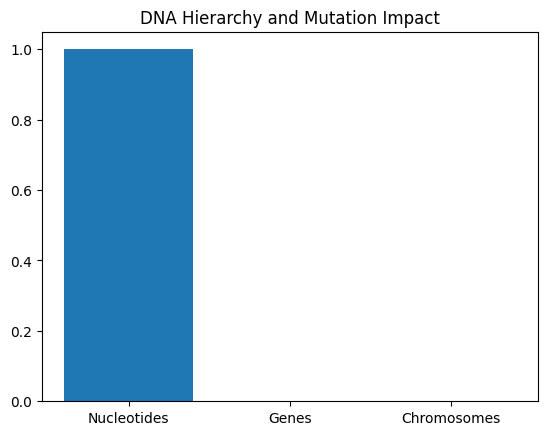

In [ ]:
import matplotlib.pyplot as plt

def visualize_hierarchy(mutation_position):
    """Visualizes the DNA hierarchy and mutation impact."""
    hierarchy = ['Nucleotides', 'Genes', 'Chromosomes']
    mutation_impact = [0, 0, 0]  # Example impact scores
    if mutation_position:
        mutation_impact[0] = 1 #Nucleotide level impact.

    plt.bar(hierarchy, mutation_impact)
    plt.title("DNA Hierarchy and Mutation Impact")
    plt.show()

#Example Usage.
visualize_hierarchy(17)